In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'data/iris.csv')
data.drop(['Id','Species'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)

In [3]:
class KNN:
    """使用python实现K近邻算法（回归预测）
        该算法用于回归预测，根据前3个特征属性，寻找最近的k个邻居，然后再根据k个邻居的
        第四个特征属性，去预测当前样本的第4个特征值。
    """
    def __init__(self,k):
        """初始化方法
        Parameters
        ------
        k: int 邻居的个数
        """
        self.k = k

    def fit(self, X, y):
        """训练方法
        Parameters
        ------
            X: 类数组类型（特征矩阵），形状为：{样本数量,特征数量}
                待训练的样本特征（属性）
            y: 类数组类型，形状为：{样本数量}
                每个样本的目标值（标签）
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)

    def predict(self, X):
        """根据参数传递样本，对样本数据进行预测
        Parameters
        ------
            X: 类数组类型，形状为：{样本数量,特征数量}
                待训练的样本特征（属性）
            :returns
            ----
            result:数组类型
                预测结果
        """
        X = np.asarray(X)
        result = []
        for x in X:
            # 欧氏距离
            # 对于测试集中的每一个小样，依次与训练集中的所有样本求距离
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            # 进行截断，只取前k个元素（取距离最近的k个元素的索引）
            index = index[:self.k]
            # 计算均值，然后加入到结果列表中
            result.append(np.mean(self.y[index]));
        return np.array(result)
    
    def predict2(self, X):
        """根据参数传递样本，对样本数据进行预测（权重）
           权重的计算方式=使用每个节点（邻居）的距离的倒数/所有距离（节点）的倒数之和
        Parameters
        ------
            X: 类数组类型，形状为：{样本数量,特征数量}
                待训练的样本特征（属性）
            :returns
            ----
            result:数组类型
                预测结果
        """
        X = np.asarray(X)
        result = []
        for x in X:
            # 欧氏距离
            # 对于测试集中的每一个小样，依次与训练集中的所有样本求距离
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            # 进行截断，只取前k个元素（取距离最近的k个元素的索引）
            index = index[:self.k]
            # 所有邻居节点距离的倒数之和.[为避免除数为零时，在其后加上一个很小的值]
            s = np.sum(1 / (dis[index] + 0.00001))
            # 使用每个节点的倒数/倒数之和 = 权重
            weight = (1 / (dis[index] + 0.00001)) / s
            # 使用邻居节点的标签值*对应的权重，然后相加，得到最终的预测结果
            result.append(np.sum(self.y[index] * weight))
        return np.array(result)

In [4]:
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:120,:-1]
train_y = t.iloc[:120,-1]
test_X = t.iloc[120:,:-1]
test_y = t.iloc[120:,-1]
knn = KNN(k=3)
knn.fit(train_X,train_y)
result = knn.predict(test_X)
print(result)
print(np.mean((result-test_y) ** 2))
print(test_y.values)

[0.2        2.06666667 0.2        1.93333333 1.26666667 1.2
 1.23333333 2.         1.13333333 1.93333333 2.03333333 1.83333333
 1.83333333 0.2        1.16666667 2.26666667 1.63333333 0.3
 1.46666667 1.26666667 1.66666667 1.33333333 0.26666667 0.23333333
 0.2        2.03333333 1.26666667 2.2        0.23333333]
0.050919540229885034
[0.2 1.6 0.2 2.3 1.3 1.2 1.3 1.8 1.  2.3 2.3 1.5 1.7 0.2 1.  2.1 2.3 0.2
 1.3 1.3 1.8 1.3 0.2 0.4 0.1 1.8 1.  2.2 0.2]


In [5]:
result = knn.predict2(test_X)
print(result)
print(np.mean((result-test_y) ** 2))
print(test_y.values)

[0.2        2.06037852 0.2        1.92515824 1.27417406 1.19617953
 1.22999542 2.04022169 1.12908216 1.9313393  2.0275088  1.85550753
 1.81360899 0.2        1.13667676 2.23576228 1.59987227 0.28786903
 1.47137928 1.25582528 1.69200468 1.39651109 0.27827606 0.24377321
 0.2        2.07159495 1.25474784 2.14171682 0.22612079]
0.05353259371358383
[0.2 1.6 0.2 2.3 1.3 1.2 1.3 1.8 1.  2.3 2.3 1.5 1.7 0.2 1.  2.1 2.3 0.2
 1.3 1.3 1.8 1.3 0.2 0.4 0.1 1.8 1.  2.2 0.2]


In [6]:
# KNN可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
# 默认情况下，matplotlib不支持中文显示。需要设置
# 设置字体为黑体，以支持中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置在中文字体时，能够正常的显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

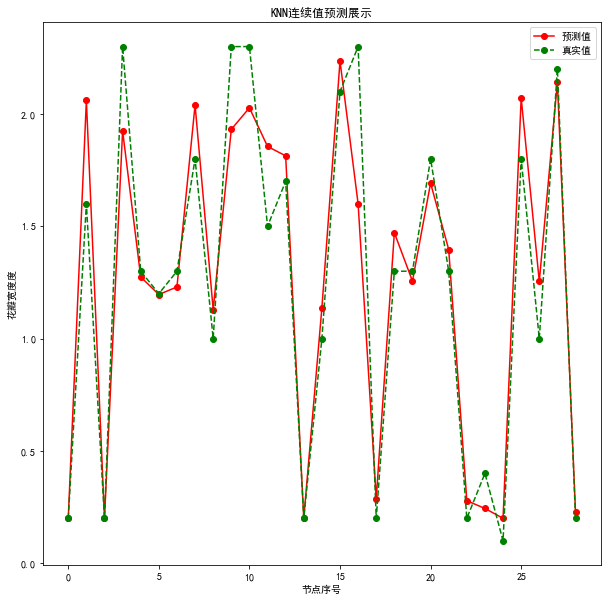

In [7]:
# 设置画布大小
plt.figure(figsize=(10,10))
# 绘制预测值
plt.plot(result,"ro-",label="预测值")
# 绘制真实值
plt.plot(test_y.values,"go--",label="真实值")

plt.title('KNN连续值预测展示')
plt.xlabel('节点序号')
plt.ylabel('花瓣宽度度')
plt.legend(loc='best')
plt.show()